### Classifying Movie Reviews

Binary Classification on IMDB Dataset

Inputs : 50,000 Reviews

Output : Positive and Negative


In [1]:
from keras.datasets import imdb

Using TensorFlow backend.
c:\users\zeesh\anaconda3\envs\tensorflow_cpu\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\zeesh\anaconda3\envs\tensorflow_cpu\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\zeesh\anaconda3\envs\tensorflow_cpu\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\zeesh\anaco

## Data Preparation

In [5]:
#((XT,YT),(Xt,Yt)) = imdb.load_data(num_words=10000,allow_pickle = True)

import numpy as np
# save np.load
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

# call load_data with allow_pickle implicitly set to true
((XT,YT),(Xt,Yt)) = imdb.load_data(num_words=10000)

# restore np.load for future normal usage
np.load = np_load_old

In [6]:
len(XT)


25000

In [7]:
len(Xt)

25000

In [8]:
#print(XT[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [9]:
word_idx = imdb.get_word_index()

In [10]:
#print(word_idx.items())

In [11]:
idx_word = dict([value,key] for (key,value) in word_idx.items())

In [13]:
#print(idx_word.items())

In [14]:
actual_review = ' '.join([idx_word.get(idx-3,'?') for idx in XT[0]])

In [16]:
#print(actual_review)

In [17]:
## Next Step - Vectorize the Data
## Vocab Size - 10,000 We will make sure every sentence is represented by a vector of len 10000 [00000111.....00101010]
import numpy as np
def vectorize_sentences(sentences,dim=10000):
  
  outputs = np.zeros((len(sentences),dim))
  
  for i,idx in enumerate(sentences):
    outputs[i,idx] = 1
   
  return outputs
    
  

In [18]:
X_train = vectorize_sentences(XT)
X_test = vectorize_sentences(Xt)

In [19]:
print(X_train.shape)
print(X_test.shape)

(25000, 10000)
(25000, 10000)


In [20]:
print(X_train[0])

[0. 1. 1. ... 0. 0. 0.]


In [21]:
Y_train = np.asarray(YT).astype('float32')
Y_test = np.asarray(Yt).astype('float32')

### Define Your Model Architecture

- Use Fully Connected/Dense Layers with RelU Activation   
- 2 Hidden Layers with 16 units each  
- 1 Output Layer with 1 unit (Sigmoid Activation)

In [22]:
from keras import models
from keras.layers import Dense


In [23]:
# Define the model
model = models.Sequential()
model.add(Dense(16,activation='relu',input_shape=(10000,)))
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


W0321 19:55:27.065819 17168 deprecation_wrapper.py:119] From c:\users\zeesh\anaconda3\envs\tensorflow_cpu\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0321 19:55:27.871645 17168 deprecation_wrapper.py:119] From c:\users\zeesh\anaconda3\envs\tensorflow_cpu\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0321 19:55:28.024155 17168 deprecation_wrapper.py:119] From c:\users\zeesh\anaconda3\envs\tensorflow_cpu\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [24]:
# Compile the Model
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

W0321 19:55:31.084422 17168 deprecation_wrapper.py:119] From c:\users\zeesh\anaconda3\envs\tensorflow_cpu\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0321 19:55:31.132425 17168 deprecation_wrapper.py:119] From c:\users\zeesh\anaconda3\envs\tensorflow_cpu\lib\site-packages\keras\backend\tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0321 19:55:31.151807 17168 deprecation.py:323] From c:\users\zeesh\anaconda3\envs\tensorflow_cpu\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [25]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


### Training and Validation


In [26]:
x_val = X_train[:5000]
x_train_new = X_train[5000:]

y_val = Y_train[:5000]
y_train_new = Y_train[5000:]

In [27]:
hist = model.fit(x_train_new,y_train_new,epochs=20,batch_size=512,validation_data=(x_val,y_val))

W0321 19:55:37.516017 17168 deprecation_wrapper.py:119] From c:\users\zeesh\anaconda3\envs\tensorflow_cpu\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 20000 samples, validate on 5000 samples
Epoch 1/20
20000/20000 [==============================] - 8s 376us/step - loss: 0.4726 - acc: 0.8063 - val_loss: 0.3667 - val_acc: 0.8578
Epoch 2/20
20000/20000 [==============================] - 3s 156us/step - loss: 0.2718 - acc: 0.9058 - val_loss: 0.2941 - val_acc: 0.8862
Epoch 3/20
20000/20000 [==============================] - 3s 146us/step - loss: 0.2024 - acc: 0.9308 - val_loss: 0.2696 - val_acc: 0.8914
Epoch 4/20
20000/20000 [==============================] - 3s 147us/step - loss: 0.1667 - acc: 0.9414 - val_loss: 0.2804 - val_acc: 0.8904
Epoch 5/20
20000/20000 [==============================] - 3s 138us/step - loss: 0.1406 - acc: 0.9517 - val_loss: 0.2835 - val_acc: 0.8900
Epoch 6/20
20000/20000 [==============================] - 3s 153us/step - loss: 0.1188 - acc: 0.9594 - val_loss: 0.3090 - val_acc: 0.8860
Epoch 7/20
20000/20000 [==============================] - 3s 149us/step - loss: 0.1058 - acc: 0.9651 - val_loss: 0.3276 - v

## Visualise our results

In [0]:
import matplotlib.pyplot as plt

In [0]:
h = hist.history

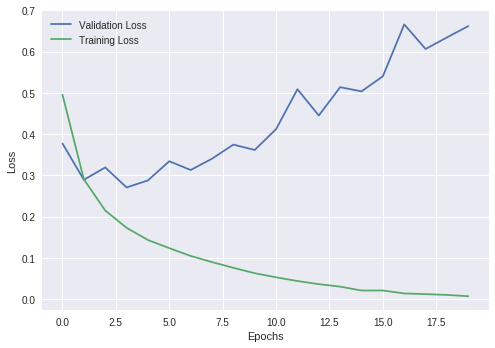

In [0]:
plt.plot(h['val_loss'],label="Validation Loss")
plt.plot(h['loss'],label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

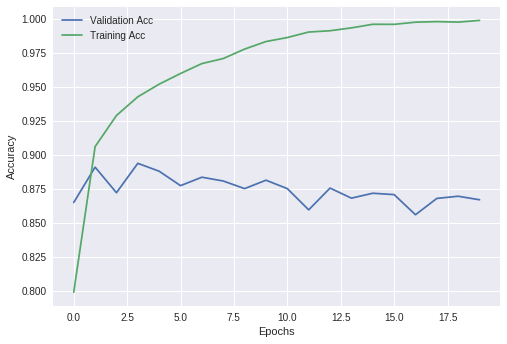

In [0]:
plt.plot(h['val_acc'],label="Validation Acc")
plt.plot(h['acc'],label="Training Acc")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [0]:
model.evaluate(X_test,Y_test)[1]

25000/25000 [==============================] - 2s 83us/step


0.8806

In [0]:
model.evaluate(X_train,Y_train)[1]

25000/25000 [==============================] - 2s 84us/step


0.9428

In [0]:
model.predict(X_test)

array([[0.32389975],
       [0.999739  ],
       [0.67278445],
       ...,
       [0.16619593],
       [0.15570958],
       [0.6937666 ]], dtype=float32)